This project is for the class of OPS802. The target of the project is to have a hands on full data analytics experience from A to Z. That means starting with raw data and reading it into python then doing some analytical and statstical observations on the data and finally doing some supervised and unsupervised learning on the data. The data we will use for this project is one of the most famous datasets in the machine learning world which is called IRIS classification dataset. That means there is plenty of resources for you online to learn from and that you are not the first person who saw and analyzed this data. Use this to your advantage. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis. We will describe it more in details later. The project measures the capabilities of lodaing data, cleaning it up, running some tests and statistical analysis and finally machine learning. The following highlights the project
-  The project consists of four parts, they are mostly independent and in order based on what we studies in class
-  The deadline of the project is the last day of the quarter
-  The project is individual, however I encourage you to talk to each other to check your different approaches without copying codes or talking about detailed code specific. For example, it is ok to ask about which function you have used to tackle part a and is it better than this other function or not. It is not ok to copy the exact code including that function you asked about.
- You are expected to heavily utilize resources outside the class notebooks such as Google, StackOverflow, .. etc
- Code cleanings and Display has 10% of the grade

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Part1: Data Loading and Cleaning up
The iris flower dataset consists of 150 collected observations for different flower's charachteristics. The dataset contains four attributes. These four attributes help decide which Iris class does the flower belong to. The four attributes are sepal length, sepal width, petal length, and petal width; all in cm. The data set contains 3 classes Iris Setosa, Iris Versicolour, and Iris Virginica. For more info about the dataset, you can chek [this link](https://en.wikipedia.org/wiki/Iris_flower_data_set). The end target of the project will be to build a model that can predict, based on the four attributes, which class does the flower belong to.

In the first part of the project we will start by loading the data and cleaning up any problems within the data. 

- load the Iris dataset using the file iris.data. You can open it with any text editor to find out how it looks like. Decide which separator you would like to use and if any rows needs to be skipped
<br>
Now let's do some exploring
- How many rows and colums are in the file
- How many nulls in the file
- Which rows contains nans and how many nans in each of these rows
- How many nans per columns?
- The 36th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper. Is that what you have? If not, fix it
- The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa",  where the errors are in the second and third features. Fix it

In [2]:
# Solve Here
import pandas as pd
import numpy as np

data = pd.read_csv('iris_not_clean.data', sep = '|')
data.columns = ['s_length', 's_width', 'p_length', 'p_width', 'species']
data = data.drop([0])
data
print('153 rows and 5 columns')

print('nan in Septal length')
data['s_length'].isnull().sum()
print('nan in Septal width')
data['s_width'].isnull().sum()
print('nan in Petal length')
data['p_length'].isnull().sum()
print('nan in Petal Width')
data['p_width'].isnull().sum()

nan_data = data[data.isna().any(axis=1)]
nan_data

print('old 36')
data.loc[[36]]
data.loc[36,['p_width']] = [0.2]
print('fixed 36')
data.loc[[36]]

print('old 39')
data.loc[[39]]
data.loc[39,['s_width','p_length']] = [3.6,1.4]
print('fixed 39')
data.loc[[39]]

data.loc[[33]]
data.loc[33,['s_length']] = [np.nan]
data.loc[[33]]

,s_length,s_width,p_length,p_width,species
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
149,6.7,3.0,5.2,2.3,Iris-virginica
150,6.3,2.5,5.0,1.9,Iris-virginica
151,6.5,3.0,5.2,2.0,Iris-virginica
152,6.2,3.4,5.4,2.3,Iris-virginica


153 rows and 5 columns
nan in Septal length


2

nan in Septal width


2

nan in Petal length


3

nan in Petal Width


3

,s_length,s_width,p_length,p_width,species
28,5.2,3.4,NaN,0.2,Iris-setosa
29,NaN,NaN,NaN,NaN,NaN
33,#is this correct?,NaN,NaN,NaN,NaN
45,NaN,3.2,2.1,NaN,NaN


old 36


,s_length,s_width,p_length,p_width,species
36,4.9,3.1,1.5,0.1,Iris-setosa


fixed 36


,s_length,s_width,p_length,p_width,species
36,4.9,3.1,1.5,0.2,Iris-setosa


old 39


,s_length,s_width,p_length,p_width,species
39,4.9,3.1,1.5,0.1,Iris-setosa


fixed 39


,s_length,s_width,p_length,p_width,species
39,4.9,3.6,1.4,0.1,Iris-setosa


,s_length,s_width,p_length,p_width,species
33,#is this correct?,NaN,NaN,NaN,NaN


,s_length,s_width,p_length,p_width,species
33,NaN,NaN,NaN,NaN,NaN


# Part 2: Stastical Exploring
In this part we will understand a little more about the data and do some cool plottings
- What is the mean and variance for each column and use the function describe to get insights about the data
- Drop the nan rows
- Recaluclate the mean and variance for each column
- What is the correlation between the fourth column and each of the other three columns individually? Any observations
- How many records exist for each class. # Hint, you can do this in one line by using groupby
- Change the random seed to 1234 and randomly pick 20 samples of the data and display it
- Plot histogram for all the data attributes
- Plot histogram for all the data attributes per class, i.e. grouped by classes

1      4.9
2      4.7
3      4.6
4      5.0
5      5.4
      ... 
149    6.7
150    6.3
151    6.5
152    6.2
153    5.9
Name: s_length, Length: 149, dtype: float64



The mean of the columns 



s_length    5.842953
s_width     3.054362
p_length    3.773154
p_width     1.206040
dtype: float64



The varience of the columns 



s_length    0.697872
s_width     0.189930
p_length    3.102788
p_width     0.578139
dtype: float64



describe function return 



,s_length,s_width,p_length,p_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.842953,3.054362,3.773154,1.206040
std,0.835388,0.435810,1.761473,0.760354
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000




The mean of the columns 



s_length    5.842953
s_width     3.054362
p_length    3.773154
p_width     1.206040
dtype: float64



The varience of the columns 



s_length    0.697872
s_width     0.189930
p_length    3.102788
p_width     0.578139
dtype: float64



Correlation between petal width and petal length


0.9624222970182472



Correlation between petal width and sepal length


0.8188788806561862



Correlation between petal width and sepal width


-0.36047992287817127



The only negative relation is between the petal width and sepal width. The strongest correlation is between petal width and length, which makes sence logically The relationship between petal width and sepal length is also positive but less correlated than petal length and petal width


records of each species


,s_length,s_width,p_length,p_width
species,,,,
Iris-setosa,14,15,24,46
Iris-versicolor,54,89,87,74
Iris-virginica,135,121,122,104


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'all atributes')

(array([10., 23., 12., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

(array([36., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

(array([ 4.,  7., 22., 24., 37., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

(array([40.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'sepal length')

<AxesSubplot:>

(array([10., 23., 12., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'petal length')

<AxesSubplot:>

Text(0.5, 1.0, 'petal length')

(array([36., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

<AxesSubplot:>

Text(0.5, 1.0, 'sepal width')

(array([ 4.,  7., 22., 24., 37., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

<AxesSubplot:>

Text(0.5, 1.0, 'petal width')

(array([40.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

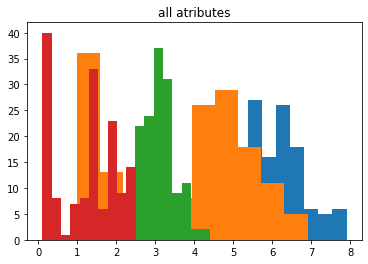

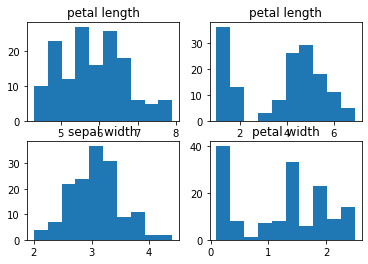

In [5]:
# Solve Here
data['s_length']
data['s_length'] = data['s_length'].astype(float)
print('\n')
print('The mean of the columns \n')
data.mean()
print('\n')
print('The varience of the columns \n')
data.var()
print('\n')
print('describe function return \n')
data.describe()

data.dropna(inplace = True)
print('\n')
print('The mean of the columns \n')
data.mean()
print('\n')
print('The varience of the columns \n')
data.var()
print('\n')

print('Correlation between petal width and petal length')
data['p_width'].corr(data['p_length'])
print('\n')
print('Correlation between petal width and sepal length')
data['p_width'].corr(data['s_length'])
print('\n')
print('Correlation between petal width and sepal width')
data['p_width'].corr(data['s_width'])
print('\n')

print('The only negative relation is between the petal width and sepal width. The strongest', 
      'correlation is between petal width and length, which makes sence logically',
      'The relationship between petal width and sepal length is also positive but less correlated than petal length and petal width')
print('\n')

print('records of each species')
data_grouped = data.groupby('species').idxmax()
data_grouped

np.random.seed(1234)

import matplotlib.pyplot as plt

plt.figure(1)
plt.title('all atributes')
plt.hist(data['s_length'])
plt.hist(data['p_length'])
plt.hist(data['s_width'])
plt.hist(data['p_width'])

plt.figure(2)
plt.title('sepal length')
plt.subplot(2,2,1)
plt.hist(data['s_length'])
plt.title('petal length')
plt.subplot(2,2,2)
plt.title('petal length')
plt.hist(data['p_length'])
plt.subplot(2,2,3)
plt.title('sepal width')
plt.hist(data['s_width'])
plt.subplot(2,2,4)
plt.title('petal width')
plt.hist(data['p_width'])




# Part 3: Statistical Analysis 
In this part, you will explore some curve fitting and dimensionality reductions attributes


- Use Scipy pdf fitting to do a curve fitting for the petal-length
- Plot the normalized histogrm of the petal-length and the estimated pdf on the same figure
- Generate new 500 samples using the estimated pdf for the petal-length 
- Calculate the mean of the new samples and compare how close it is to the mean of the given data

(3.773154362416107, 1.7555522992782366)

(array([0.40950973, 0.14787851, 0.        , 0.03412581, 0.09100216,
        0.29575702, 0.32988283, 0.20475486, 0.12512797, 0.05687635]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

mean of genrated data


1.2067505582558915

mean of petal length


3.77315436241611

0.007417558255891521

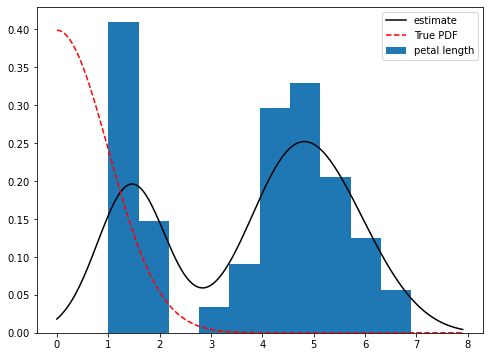

In [6]:
# Solve Here
import scipy.stats
from scipy.stats import norm
from numpy import linspace

norm.fit(data['p_length'])
x = linspace(data['p_length'].min()-1, data['p_length'].max()+1, 200)
best_fit = scipy.stats.gaussian_kde(data['p_length'])
fig = plt.figure(figsize = (8,6))
plt.hist(data['p_length'], density= True, label=('petal length'))
plt.plot(x, best_fit(x), 'k-', label = ('estimate'))
plt.plot(x, scipy.stats.norm.pdf(x), 'r--', label = ('True PDF'))
plt.legend()


mean, standard_deviation = 1.199333, 0.762238 # mean and standard deviation
pdf_500 = np.random.normal(mean, standard_deviation, 500)
print("mean of genrated data")
pdf_500.mean()
print("mean of petal length")
data['p_length'].mean()

abs(mean - np.mean(pdf_500))




##### PCA
- Use Scikit to do PCA on the IRIS dataset
- do a bar plot that shows the importance of info in each of the new dimensions
- use PCA to reduce the number of attributes by 1. Note that for all the next parts, you will use the reduced data

array([0.72898991, 0.22897298, 0.03679724, 0.00523987])

<BarContainer object of 4 artists>

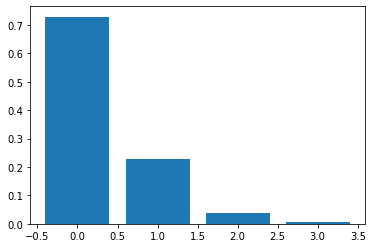

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
features = ['s_length', 's_width', 'p_length', 'p_width']
x_attributes = data.loc[:, features].values
y_target = data.loc[:,['species']].values
x_attributes = StandardScaler().fit_transform(x_attributes)

pca_all = PCA()
reduced_data_pca = pca_all.fit_transform(x_attributes)
pca_all.explained_variance_ratio_
plt.bar(np.arange(4),pca_all.explained_variance_ratio_)
X = reduced_data_pca



# Part 4: Machine Learning
In this part, you will explore the use of supervised and non supervised learning

### Non-Supervised Learning 
- using Kmeans, divide the data into different clusters. The number of clusters should be the same as the number of categories you have in the data
- Do scatter plot for each two combination of the three dimensions together (0 vs 1), (0 vs 2), (1 vs 2). Use the kmeans labels to color the points in the scatter plots

<Figure size 720x720 with 0 Axes>

KMeans(n_clusters=4)

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

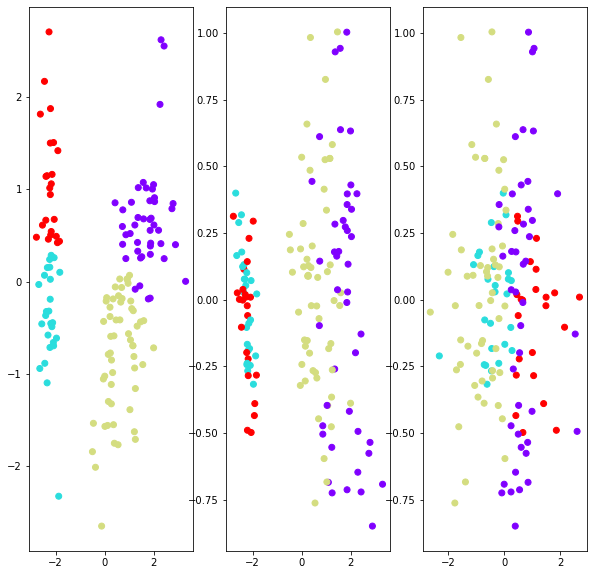

In [8]:

from sklearn.cluster import KMeans
plt.figure(figsize=(10,10))
kmeans = KMeans(n_clusters=4)  
kmeans.fit(X) 
plt.subplot(1,3,1)
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_, cmap='rainbow')
plt.subplot(1,3,2)
plt.scatter(X[:,0],X[:,2],c=kmeans.labels_,cmap='rainbow')
plt.subplot(1,3,3)
plt.scatter(X[:,1],X[:,2],c=kmeans.labels_,cmap='rainbow')

### Supervised-Learning
- Divide your dataset to 80% training and 20% validation
- Build a Logistci regression model for the reduced IRIS dataset
- What is the training accuracy
- What is the validation accuracy
- Form the confusion matrix

In [9]:
# Solve Here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=.2)
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
V_score = logisticRegr.score(X_test, y_test)
print(V_score)
A_score = accuracy_score(X_test, y_test)
print(A_score)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)




C:\Users\Brady\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

0.9666666666666667


ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets